# Honours Assignment - Natural Processes (GEO1-2412)

*Gerbrand Koren, Utrecht University (g.b.koren@uu.nl)*

---

## Table of Contents

- [1. Introduction](#sec_intro)
- [2. Carbon dioxide respiration](#sec_resp)
    - [2.1 Temperature sensitivity](#sec_temp)
    - [2.2 Temperature coefficients](#sec_coeff)
    - [2.3 Seasonal variation](#sec_seas)
- [3. Transpiration](#sec_transp)
- [4. Research Assignment](#sec_res)
- [References](#sec_refs)

## 1. Introduction <a class="anchor" id="sec_intro"></a>

We are going to explore carbon and/or water cycling in the Earth system using Jupyter Notebooks. Before we dive into these natural processes, we first briefly explain what a Jupyter Notebook is, and how you can interact with it.

#### What is a Jupyter Notebook?

A Jupyter Notebook is a piece of software that allows you to write texts (like the one you are reading now!), write code, perform calculations and create figures. Jupyter Notebooks can be used for teaching, but also for scientific research (perhaps also your BSc and MSc thesis project research). For more information on Jupyter Notebooks, visit www.jupyter.org

#### How does a Jupyter Notebook work?

A Jupyter Notebook consists of different 'cells'. The cell that you are now reading is of the type 'Markdown'. This is text with a some basic formatting (e.g. *italic* or **boldface** text, or mathematical equations, e.g. $y = ax+b$). You can add new cells by clicking `Insert` > `Insert Cell Below`. By default, new cells are of the type 'Code', but you can change the behavior of the cell (e.g. to 'Markdown') by selecting a different type in the menu above.

You can execute a piece of code by one of the following options:

- Select the cell containing the code and press the button 'Run' in the menu above
- Press `ctrl` + `enter` while selecting the cell

#### Exercise 1: Test Jupyter Notebook

> Try to execute the following cell, and see whether you are able to get the expected result. Note that the line starting with the symbol `#` will be ignored by Python: this is called a 'comment'. Using comments is helpful to make your code more easily readable so that someone else is also able to understand your code

In [1]:
# -- Test code
1+1

2

> Assuming this all went well (i.e. you got the result 2), we are ready to explore some more exciting functions!

---

## 2. Carbon dioxide respiration  <a class="anchor" id="sec_resp"></a>

### 2.1 Temperature sensitivity  <a class="anchor" id="sec_temp"></a>

The carbon dioxide respiration flux is the release of CO$_2$ by vegetation (autotrophic respiration) and other organisms (heterotrophic respiration). Contrary to the photosynthetic uptake of carbon through photosynthesis (the uptake of CO$_2$ by vegetation from the atmosphere), there is no light required, and respiration therefore continues day and night (usually photosynthesis dominates during day time).

Following Flanagan and Johnson (2005), we have the following relation for terrestrial ecosystem respiration $R$ (in $\mu mol\ m^{-2}\ s^{-1}$):

$$R(T_{soil})=R_{10} \times Q_{10}^{\big(\frac{T_{soil}-T_{ref}}{10}\big)}$$

In this equation $T_{soil}$ is the soil temperature in &deg;$C$. The reference temperature $T_{ref}$ equals 10 &deg;$C$ and $R_{10}$ is the respiration rate (in $\mu mol\ m^{-2}\ s^{-1}$) at the reference temperature. Finally, $Q_{10}$ is a coefficient that describes how sensitive the respiration is to temperature changes.

#### Exercise 2a: Plot temperature sensitivity

> Here we will explore the respiration equation using the value $Q_{10}$ = 2 (see Fig. 4a in Flanagan and Johnson, 2005) and for $R_{10}$ we take 1.5 $\mu mol\ m^{-2}\ s^{-1}$ (see Fig. 4b in Flanagan and Johnson, 2005; note that this number is quite uncertain). We will create a plot of the respiration $R$ as a function of soil temperatures ranging from 10 to 40 &deg;$C$. First we need to import Python libraries NumPy to do some maths (more advanced than `1+1`) and matplotlib to make a figure. 

In [2]:
# -- Settings
%matplotlib inline

# -- Import statements
import matplotlib.pyplot as plt
import numpy as np

> Executing the cell above gives no direct output, but you can see that the number to the left of the cell is increasing every time you successfully execute this cell. Next we define the constants in the equation and assign value. It is good practice to also write down the units. Note that this follows `#` and is thus a comment that is ignored by the computer.

In [3]:
# -- Define constants
Tref = 10 # deg C
Q10 = 2 # -
R10 = 1.5 # umol/m2/s

> Again, executing this cell does not give us direct output, but if you execute the cell above you can see that the 'counter' to the left of the cell is increasing (meaning that the code in the cell is executed). The values of the variables are now stored in memory. We can inspect the memory by executing `%whos`. This is called 'cell magic', it is not part of the original Python language, but is a convenient additional feature from the Jupyter Notebook environment

In [4]:
# -- Show memory
%whos

Variable   Type      Data/Info
------------------------------
Q10        int       2
R10        float     1.5
Tref       int       10
np         module    <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
plt        module    <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>


> A more direct way to retrieve the value of a specific variable is by using Python's `print()` function.

In [5]:
# -- Print Tref value
print(Tref)

10


> As expected we get exactly the value that we assigned to the variable $T_{ref}$. Now we will also define values in the range from 10 to 40 &deg;$C$ for $T_{soil}$ using the command `np.linspace()`. This time we will again use the print function to inspect the variable $T_{soil}$ that we defined

In [6]:
# -- Define Tsoil
Tsoil = np.linspace(10,40) # deg C

# -- Print Tsoil values
print(Tsoil)

[10.         10.6122449  11.2244898  11.83673469 12.44897959 13.06122449
 13.67346939 14.28571429 14.89795918 15.51020408 16.12244898 16.73469388
 17.34693878 17.95918367 18.57142857 19.18367347 19.79591837 20.40816327
 21.02040816 21.63265306 22.24489796 22.85714286 23.46938776 24.08163265
 24.69387755 25.30612245 25.91836735 26.53061224 27.14285714 27.75510204
 28.36734694 28.97959184 29.59183673 30.20408163 30.81632653 31.42857143
 32.04081633 32.65306122 33.26530612 33.87755102 34.48979592 35.10204082
 35.71428571 36.32653061 36.93877551 37.55102041 38.16326531 38.7755102
 39.3877551  40.        ]


> The function `np.linspace` creates an array of 50 decimal values ('floats') from the selected starting value of 10 to 40 (in equal steps). To find more about the function `np.linspace`, we can execute the following command

In [7]:
# -- Show function description
np.linspace?

> Now we will write the equation for respiration (as taken from Flanagan and Johnson, 2005). Writing the equation in Python is similar to how you would type this in a calculator, with the exception of raising something to a power (in many programming languages the symbol `^` is used, but in Python this is `**`)

In [8]:
# -- Calculate respiration (Flanagan and Johnson, 2005)
R = R10*Q10**((Tsoil-Tref)/10) # deg C

> Note that in this equation $R_{10}$, $T_{ref}$ and $T_{soil}$ are constants, whereas $T_{soil}$ is an 'array' with 50 decimal values. Because of this, $R$ will also be an array of 50 values, which we can check with the `print()` function

In [9]:
# -- Print respiration values
print(R)

[ 1.5         1.5650264   1.63287175  1.70365826  1.77751343  1.85457029
  1.93496764  2.01885029  2.10636933  2.1976824   2.29295398  2.39235567
  2.49606651  2.60427332  2.71717099  2.83496288  2.95786117  3.0860872
  3.21987195  3.3594564   3.50509196  3.65704096  3.81557709  3.98098591
  4.15356536  4.33362628  4.52149302  4.71750395  4.92201214  5.13538594
  5.35800971  5.59028441  5.83262845  6.08547832  6.34928947  6.62453708
  6.91171693  7.2113463   7.52396487  7.85013575  8.19044645  8.54550992
  8.91596573  9.30248115  9.70575237 10.12650577 10.56549922 11.02352345
 11.50140345 12.        ]


> Next we plot the respiration rates as a function of soil temperature using some functions from the matplotlib library

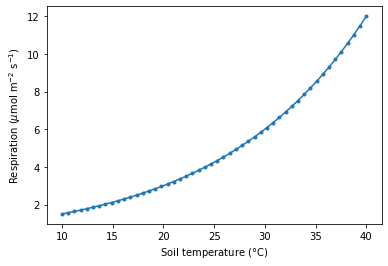

In [10]:
# -- Plot figure
plt.figure(facecolor='w')
plt.plot(Tsoil,R,'.-')
plt.xlabel('Soil temperature ($\degree$C)')
plt.ylabel('Respiration ($\mu$mol m$^{-2}$ s$^{-1}$)')
plt.show()

### 2.2 Temperature coefficients <a class="anchor" id="sec_coeff"></a>

In the previous section we described how respiration varies with temperature, for a given value of $Q_{10}$. Now we will investigate the effect of the sensitivity coefficient $Q_{10}$. To do this, we will make use of the option to define functions in Python.

#### Exercise 2b: Plot $Q_{10}$, and temperature sensitivity

> First we will define a function that has the same $Q_{10}$ as we used in the previous exercise

In [11]:
def calc_resp(Tsoil):
    
    # -- Define constants
    Tref = 10 # deg C
    Q10 = 2 # -
    R10 = 1.5 # umol/m2/s

    # -- Calculate respiration (Flanagan and Johnson, 2005)
    R = R10*Q10**((Tsoil-Tref)/10) # deg C
    
    # -- Return result
    return R

> Note that the code from lines 3 to 9 is identical to what we did in the previous exercise, except that this is all indented with a tab and there are lines added in front (`def ...`) and to the end (`return ...`). This defines a Python function and we will now demonstrate how we can use it to calculate the respiration rate $R$ and produce the same plot as in the previous exercise.

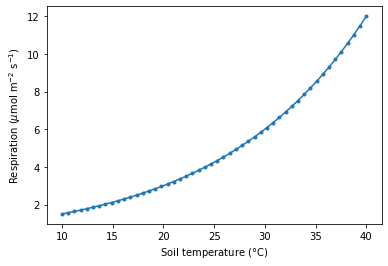

In [12]:
# -- Define Tsoil
Tsoil = np.linspace(10,40) # deg C

# -- Calculate respiration
R = calc_resp(Tsoil) # umol/m2/s

# -- Plot figure
plt.figure(facecolor='w')
plt.plot(Tsoil,R,'.-')
plt.xlabel('Soil temperature ($\degree$C)')
plt.ylabel('Respiration ($\mu$mol m$^{-2}$ s$^{-1}$)')
plt.show()

> So we get the same result as we had last time! Note how the function is applied ('called') by the name that was used to define it (`calc_resp`). So far, it might perhaps not be super clear what the benefit is of defining a function, but if the calculation is much more complex, the use of functions can simplify the code a lot. We will now modify the function slightly so that we can provide the two variables $T_{soil}$ and $Q_{10}$. 

In [13]:
def calc_resp(Tsoil,Q10):

    # -- Define constants
    Tref = 10 # deg C
    R10 = 1.5 # umol/m2/s

    # -- Calculate respiration (Flanagan and Johnson, 2005)
    R = R10*Q10**((Tsoil-Tref)/10) # deg C
    
    # -- Return result
    return R

> Note the function that we have now defined has the same name as our earlier function. Because of this, the old function is now overwritten (without warning). We made two small changes: we have added `Q10` as second argument in the function definition, and we remove `Q10 = 2` from the body (i.e. the indented part) of the function. Next, we will use our new function to investigate the respiration rate for different $T_{soil}$ and $Q_{10}$ values.

In [14]:
# -- Calculate respiration rates
R_14 = calc_resp(Tsoil,1.4) # umol/m2/s
R_16 = calc_resp(Tsoil,1.6) # umol/m2/s
R_18 = calc_resp(Tsoil,1.8) # umol/m2/s
R_20 = calc_resp(Tsoil,2.0) # umol/m2/s

> Now we will plot the different variables in a single figure to easily compare the different variables

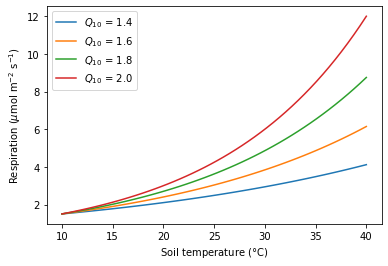

In [15]:
# -- Plot figure
plt.figure(facecolor='w')
plt.plot(Tsoil,R_14,label='$Q_{10}$ = 1.4')
plt.plot(Tsoil,R_16,label='$Q_{10}$ = 1.6')
plt.plot(Tsoil,R_18,label='$Q_{10}$ = 1.8')
plt.plot(Tsoil,R_20,label='$Q_{10}$ = 2.0')
plt.legend()
plt.xlabel('Soil temperature ($\degree$C)')
plt.ylabel('Respiration ($\mu$mol m$^{-2}$ s$^{-1}$)')
plt.show()

> Note that higher values for $Q_{10}$ lead to higher respiration rates (for temperatures larger than 10 &deg;$C$). Also note the use of the `label` and `legend` function to be able to distinguish between the different curves. 

### 2.3 Seasonal variation <a class="anchor" id="sec_seas"></a>

So far we have considered the variation of the respiration process as the function of other processes or physical variables. Here we will investigate the variation of respiration during a season.

#### Exercise 2c: Plot seasonal variation of respiration

> Here we will explore seasonal variation of respiration based on the seasonal variation of soil temperatures as given in Fig. 1c in Flanagan and Johnson (2005). We will first define the months (in this case using the function `np.arange()` because we only want to have integer values)

In [16]:
# -- Define months
months = np.arange(12)+1

# -- Print values months
print(months)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


> Next we create a temperature profile that looks a bit like Fig. 1c in Flanagan and Johnson (2005). For this we are now using a sine function (alternatively we could also fit a parabola on this data, or just manually read off the data for the different months)

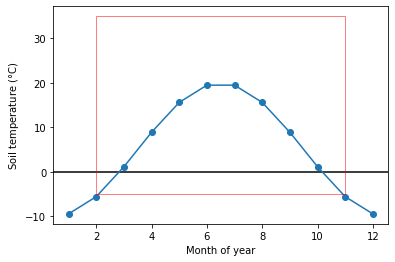

In [17]:
# -- Monthly temperature
Tsoil = 15*np.sin((months-3.5)*(2*np.pi)/12)+5 # deg C

# -- Plot monthly temperature
plt.figure(facecolor='w')
plt.axhline(0,color='k')
plt.plot(months,Tsoil,'o-')
plt.plot([2,2,11,11,2],[-5,35,35,-5,-5],'r-',lw=0.5)
plt.xlabel('Month of year')
plt.ylabel('Soil temperature ($\degree$C)')
plt.show()

> Note that the red box corresponds (loosely) to the boundaries of Fig. 1c in Flanagan and Johnson (2005). We will now plug this monthly varying soil temperature into the respiration function that we wrote in the previous section (for $Q_{10}$ = 2)

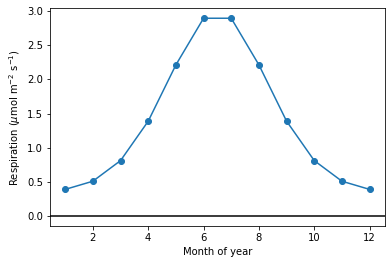

In [18]:
# -- Monthly respiration
R = calc_resp(Tsoil,2.0) # umol/m2/s

# -- Plot monthly temperature
plt.figure(facecolor='w')
plt.axhline(0,color='k')
plt.plot(months,R,'o-')
plt.xlabel('Month of year')
plt.ylabel('Respiration ($\mu$mol m$^{-2}$ s$^{-1}$)')
plt.show()

> This approximates the soil respiration rate for the grassland site that was studied by Flanagan and Johnson (2005). 

Perhaps this result already raises a lot of new questions. For instance, what we would get for forest sites, or for instance for croplands? Also you might be interested to investigate the role of soil moisture on the respiration rate (see Fig. 5 in Flanagan and Johnson, 2005)

Further, you might wonder how photosynthesis is varying for different seasons. In the lecture of Natural Processes (Lecture 1: Energy in the atmosphere) we discussed the seasonal variation of CO$_2$ concentrations from which we already concluded that during spring and summer the uptake of CO$_2$ by vegetation is larger than the release of CO$_2$.

Finally, you could wonder how respiration is going to change because of a changing climate with higher temperatures, and how large the possible feedback of this will be (climate change &rarr; higher $T$ &rarr; higher $R$ &rarr; more atmospheric CO$_2$ &rarr; more climate change &rarr; ...?)

---

## 3. Transpiration <a class="anchor" id="sec_transp"></a>

Transpiration is the release of water through small openings ('stomates') in leaves. The transpiration rate depends on the difference between humidity inside and outside the leaf (see e.g. Eq. 6.20 in Moene and van Dam, 2014). The usual assumption is that air inside the leaves is at full saturation (i.e., 100% relative humidity), whereas the relative humidity outside the leaves is more variable (depending on atmospheric conditions).

The saturation vapor pressure depends on temperature (Clausius-Clapeyron relation). This can be approximated, following Alduchov and Eskridge (1996), as:

$$e_{sat} = 6.1094 \times \exp \bigg(\frac{17.625\times T}{243.04+T}\bigg)$$

Here the air temperature $T$ is expressed in &deg;$C$ and the saturation vapor pressure $e_{sat}$ in $hPa$

#### Exercise 3: Plot saturation vapor pressure

> We will now create a function containing the equation for $e_{sat}$ with a short description ('docstring') of the function

In [19]:
def calc_esat(T):
    """
    This function calculates the saturation vapor pressure 
    based on the approximation by Alduchov and Eskridge (1996). 
    
    Input: 
    - temperature (in degree Celsius)
    
    Output:    
    - saturation vapor pressure (in hPa)    
    """
    
    # -- Calculate saturation vapor pressure
    esat = 6.1094*np.exp((17.625*T)/(243.04+T)) # hPa
    
    # -- Return result
    return esat

> We will now retrieve the description of the function `calc_esat` that we defined ourselves, similar to what we have done for the NumPy function `np.linspace`

In [20]:
# -- Print function description
calc_esat?

> We will now define a temperature range from 0 to 35 &deg;$C$ and calculate $e_{sat}$ with the function `calc_esat` that we created above

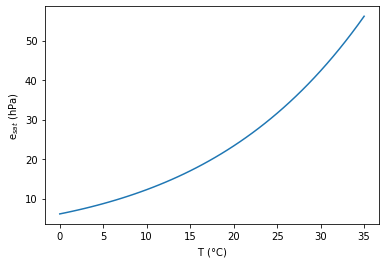

In [21]:
# -- Define temperature
T = np.linspace(0,35) # deg C

# -- Calculate saturation vapor pressure
esat = calc_esat(T) # hPa

# -- Plot figure
plt.figure(facecolor='w')
plt.plot(T,esat)
plt.xlabel('T ($\degree$C)')
plt.ylabel('e$_{sat}$ (hPa)')
plt.show()

> This is similar to a figure that was discussed in the Natural Processes class (Tutorial Coriolis force and stability).

Again, there are many open questions. For instance, you may wonder how a changing climate would affect transpiration rates. Global warming tends to increase transpiration rates because of larger atmospheric water demand. However, due to higher CO$_2$ concentrations in the atmosphere, plants are also able to reduce the opening of their stomates, which increases water use efficiency (WUE). These processes could all be modeled and investigated in a Jupyter Notebook environment.


## 4. Research Assignment <a class="anchor" id="sec_res"></a>

In this Notebook we explored some basic Python and Jupyter Notebook features, including defining functions and plotting figures. We also investigated the temperature sensitivity of respiration (an important process for carbon cycling) and the saturation vapor pressure, which controls transpiration rates (an important process for water cycling). You can now use the developed skills and functions for a short research assignment (see separate pdf file).

## References <a class="anchor" id="sec_refs"></a>

Alduchov and Eskridge (1996). Improved Magnus form approximation of saturation vapor pressure. *Journal of Applied Meteorology and Climatology*. [https://doi.org/10.1175/1520-0450(1996)035<0601:IMFAOS>2.0.CO;2](https://doi.org/10.1175/1520-0450(1996)035<0601:IMFAOS>2.0.CO;2)

Flanagan and Johnson (2005). Interacting effects of temperature, soil moisture and plant biomass production on ecosystem respiration in a northern temperate grassland. *Agricultural and Forest Meteorology*.
https://doi.org/10.1016/j.agrformet.2005.04.002

Moene and van Dam (2014). Transport in the Atmosphere-Vegetation-Soil Continuum. Cambridge University Press.  https://doi.org/10.1017/CBO9781139043137